In [1]:
# importing relevant libraries

import pandas as pd
import datetime
import numpy as np

In [2]:
#reading in the dataset
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [5]:
# Computing duration 
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)

/tmp/ipykernel_24329/1280888230.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df['duration'] = df['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)


In [6]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,13.0
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,10.0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,11.0


In [7]:
# Computing the standard deviation of the trips in Jnauary
np.std(df['duration'])

42.59587215472152

In [8]:
# Computing the percentage of data left after dropping outliers  

df['duration'].shape[0]

3066766

In [9]:
# Applying the defined outlier logic
df_trimmed = df[(df['duration'] >= 1 )&(df['duration'] <= 60)]

In [10]:
df_trimmed.shape[0]

3017017

In [11]:
#computing the fraction left 
100 - ((df['duration'].shape[0] - df_trimmed.shape[0])/(df['duration'].shape[0]))*100

98.37780254509147

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
df_trimmed.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [14]:
categorical = ['PULocationID','DOLocationID']
numerical = ['duration']

In [15]:
# encoding the prescribed columns 
# casting as strings first

df_trimmed['PULocationID'] = df_trimmed['PULocationID'].astype('str')
df_trimmed['DOLocationID'] = df_trimmed['PULocationID'].astype('str')



/tmp/ipykernel_24329/1427150686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['PULocationID'] = df_trimmed['PULocationID'].astype('str')
/tmp/ipykernel_24329/1427150686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['DOLocationID'] = df_trimmed['PULocationID'].astype('str')


In [16]:
from sklearn.feature_extraction import DictVectorizer

In [17]:
# fitting the encoder and deriving a feature matrix
#df_trimmed = df_trimmed.sample(n = 500000)

# y = df_trimmed.duration

# df_trimmed = df_trimmed[['PULocationID', 'DOLocationID']]
# X = pd.get_dummies(df_trimmed, columns=['PULocationID', 'DOLocationID'])

dv = DictVectorizer()
train_dicts = df_trimmed[['PULocationID', 'DOLocationID']].to_dict(orient = 'records')

In [18]:
X_train = dv.fit_transform(train_dicts)

In [21]:
y_train = df_trimmed['duration'].values

In [22]:
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

In [23]:
model = LinearRegression()

In [24]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X.sample, y, test_size=0.2, random_state=42)

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_train)

/tmp/ipykernel_24329/3743470402.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred , label ='prediction')
/tmp/ipykernel_24329/3743470402.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label = 'acttual')


<Axes: ylabel='Density'>

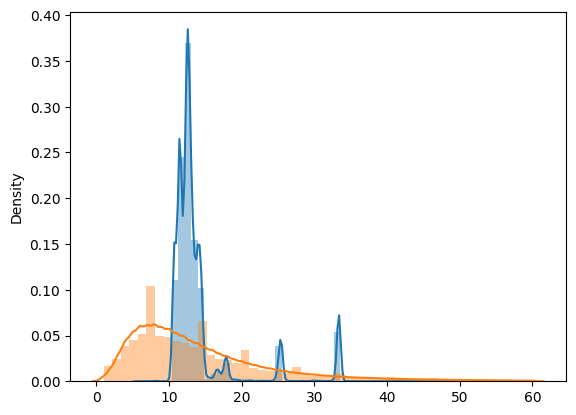

In [27]:
import seaborn as sns 

sns.distplot(y_pred , label ='prediction')
sns.distplot(y_train, label = 'acttual')
             

In [28]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, y_pred, squared = False)
print(f"Mean squared error: {rmse:.2f}")

Mean squared error: 8.53


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
validation = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
# Computing duration 
validation['duration'] = validation['tpep_dropoff_datetime'] - validation['tpep_pickup_datetime']
validation['duration'] = validation['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)

/tmp/ipykernel_24329/3380123620.py:4: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  validation['duration'] = validation['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)


In [30]:
# validation  
# casting as strings first
validation = validation[(validation['duration'] >= 1 )&(validation['duration'] <= 60)]
validation['PULocationID'] = validation['PULocationID'].astype('str')
validation['DOLocationID'] = validation['PULocationID'].astype('str')

y_val = validation.duration.values

validation = validation[['PULocationID', 'DOLocationID']].to_dict(orient = 'records')


X_validation = dv.transform(validation)


In [31]:
y_val_pred = model.predict(X_validation)

In [32]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_val, y_val_pred, squared = False)
print(f"Mean squared error: {rmse:.2f}")

Mean squared error: 12.57


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
import pickle
with open('/workspaces/mlops-zoomcamp/models/lin_reg.bin' , 'wb') as f_out:
    pickle.dump((dv,model), f_out)

